# Thailand Fatal Road Accident [2011–2022] Dataset: 
### Introduction

The dataset **"Thailand Fatal Road Accident [2011–2022]"**, available on Kaggle and provided by Thaweewat R., is described as follows:

This dataset provides comprehensive statistics on recorded road accidents in Thailand, spanning from approximately 2019 to 2022. The data was sourced from official records and formatted for public use.

> Note: Although the Kaggle page mentions data from 2019 to 2022, the dataset itself covers fatal road accidents from **2011 to 2022**, as confirmed by the file contents and metadata.

### Dataset Information

- **Source**: Compiled by Thaweewat R., likely based on official Thai government road safety records (exact sources are not explicitly cited).
- **Content**: Composed of two files (one in CSV format), totaling approximately 12 MB. The dataset focuses specifically on fatal road accidents across Thailand.
- **Details**: While the full data dictionary is not provided, the dataset likely includes information on:
  - Date of the accident
  - Number of fatalities
  - Location details
  - Possibly accident causes or involved vehicle types
- **Usability**: Rated 10.0 on Kaggle for ease of use and formatting quality.

### Context

Thailand has consistently ranked among the countries with the highest road traffic fatality rates globally. According to the World Health Organization:
- In 2013, Thailand recorded **36.2 deaths per 100,000 population**.
- In 2021, this figure was reduced to **25.4 deaths per 100,000**.
- Notably, **over 80%** of these fatalities involved **motorcyclists**.

This underscores the critical importance of traffic safety research and highlights the potential value of predictive modeling and trend analysis using this dataset.

### Use Cases

This dataset is suitable for:
- Time series analysis of road accident frequency
- Trend detection and seasonal decomposition
- Regional accident pattern analysis
- Deep learning model development (e.g., LSTM, GRU)
- Evaluation of traffic policies or public safety campaigns

### Link
(https://www.kaggle.com/datasets/thaweewatboy/thailand-fatal-road-accident)


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/thailand-fatal-road-accident/thailand_fatal_raod_accident_2011_2022.parquet
/kaggle/input/thailand-fatal-road-accident/thailand_fatal_raod_accident_2011_2022.csv


# 1. Imports and Environment Setup

We begin by importing the essential libraries required for data manipulation, time series analysis, preprocessing, visualization, and deep learning model creation. We also suppress warning messages to maintain a clean output view.


In [2]:
# Core libraries
import pandas as pd
import numpy as np
import warnings

# Time series analysis
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

# Visualization
import matplotlib.pyplot as plt

# Data normalization
from sklearn.preprocessing import MinMaxScaler

# Deep learning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense

# Suppress warnings
warnings.filterwarnings('ignore')


2025-07-01 19:18:49.326072: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751397529.595413      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751397529.676876      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# 2. Dataset Loading and Initial Exploration

In this section, we load the Thailand Fatal Road Accident dataset and conduct an initial exploration to understand its structure. We inspect the first few records, check the data types of each column, and identify any missing values.

The dataset is assumed to be available in CSV format and already uploaded to the environment.


In [3]:
# Define file paths and the dataset name
file_path = "/kaggle/input/thailand-fatal-road-accident/thailand_fatal_raod_accident_2011_2022.csv"  # Change for each dataset
output_file = "processed_Accident.csv"  # Output file for preprocessed data
dataset_name = "Accident"  # Change for each dataset

In [4]:
# Load CSV file
data = pd.read_csv(file_path)
print("Dataset loaded successfully!")

Dataset loaded successfully!


In [5]:
# Display dataset structure and data types
print(f"--- Information for Data Set: ")
print(data.info()) 
print("\nOverview of the first 5 rows:\n")
try:
    from IPython.display import display
    display(data.head(5))  # Use display in Jupyter environments
except ImportError:
    print(data.head(5))  # Fallback to print in non-Jupyter environments

--- Information for Data Set: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240924 entries, 0 to 240923
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   accident_date        106950 non-null  object 
 1   official_death_date  240924 non-null  object 
 2   age                  211110 non-null  float64
 3   gender               240924 non-null  object 
 4   nationality          240924 non-null  object 
 5   accident_cause_code  240924 non-null  object 
 6   accident_cause       240924 non-null  object 
 7   vehicle_type         240924 non-null  object 
 8   province_th          240924 non-null  object 
 9   district_th          240924 non-null  object 
 10  sub_district_th      240924 non-null  object 
 11  province_en          240924 non-null  object 
 12  district_en          240924 non-null  object 
 13  sub_district_en      240924 non-null  object 
 14  latitude             240924 non-null 

,accident_date,official_death_date,age,gender,nationality,accident_cause_code,accident_cause,vehicle_type,province_th,district_th,sub_district_th,province_en,district_en,sub_district_en,latitude,longitude
0,2011-01-01 00:25:00,2011-01-01,21.0,Male,Thai,V892,Person injured in unspecified motor-vehicle ac...,unidentified,เพชรบูรณ์,บึงสามพัน,บึงสามพัน,Phetchabun,Bueng Sam Phan,Bueng Sam Phan,15.794114,101.006878
1,2011-01-01 06:35:00,2011-01-01,23.0,Male,Thai,V299,Motorcycle rider [any] injured in unspecified ...,moterbike,สุราษฎร์ธานี,พนม,พังกาญจน์,Surat Thani,Phanom,Phangkan,8.916207,98.890434
2,2011-01-01 19:00:00,2011-01-01,26.0,Male,Thai,V234,Motorcycle rider injured in collision with car...,moterbike,ระยอง,บ้านฉาง,บ้านฉาง,Rayong,Ban Chang,Ban Chang,12.734329,101.065845
3,2011-01-01 02:00:00,2011-01-01,16.0,Male,Thai,V429,Car occupant injured in collision with two-or ...,car,พิษณุโลก,บางระกำ,ปลักแรด,Phitsanulok,Bang Rakam,Plak Rad,16.662980,100.120976
4,2011-01-01 02:00:00,2011-01-01,12.0,Male,Thai,V429,Car occupant injured in collision with two-or ...,car,พิษณุโลก,บางระกำ,ปลักแรด,Phitsanulok,Bang Rakam,Plak Rad,16.662980,100.120976


# 3. Data Preprocessing

In this stage, we prepare the dataset for time series modeling by performing the following key operations:

- **Date Standardization**: We handle heterogeneous date formats using a custom parsing function to ensure all dates follow the standard `YYYY-MM-DD` format. This step is essential for reliable time-based operations.
  
- **Daily Aggregation**: Accident records are grouped by date to compute the number of fatal accidents per day.
  
- **Completing the Time Series**: We generate a complete daily time index spanning the full date range and fill any missing dates with zero accident counts to maintain continuity in the time series.

These preprocessing steps ensure the data is clean, temporally aligned, and suitable for time series analysis and deep learning models such as LSTM and GRU.



## 3.1 Date Standardization

In many real-world datasets, date formats are inconsistent across rows or files. To address this, we apply a custom parsing function to standardize the `accident_date` column to a unified format (`YYYY-MM-DD`). This ensures consistency before aggregation and modeling.


In [6]:
# Standardize accident_date column
print(f"Date Standardization for {dataset_name}")
print(f"Rows before standardization: {len(data)}")

def parse_date(date_str):
    try:
        return pd.to_datetime(date_str, format='%d/%m/%Y')  # For format like 4/01/2005
    except:
        return pd.to_datetime(date_str)  # For format like 2011-01-01 00:25:00

data['accident_date'] = data['accident_date'].apply(parse_date)
data['accident_date'] = data['accident_date'].dt.strftime('%Y-%m-%d')  # Unify format
data['accident_date'] = pd.to_datetime(data['accident_date'])

print(f"Rows after standardization: {len(data)}")
print("accident_date format unified to YYYY-MM-DD")

Date Standardization for Accident
Rows before standardization: 240924
Rows after standardization: 240924
accident_date format unified to YYYY-MM-DD


## 3.2 Daily Aggregation

In [7]:
# Step 3.2: Daily Aggregation of Fatal Road Accidents

# Ensure the 'accident_date' column is in datetime format
data['accident_date'] = pd.to_datetime(data['accident_date'])

# Group by day (Period object for daily frequency), count number of records
daily_incidents = (
    data.groupby(data['accident_date'].dt.to_period('D'))
        .size()
        .reset_index(name='daily_accidents')
)

# Convert Period object back to timestamp (datetime format)
daily_incidents['accident_date'] = daily_incidents['accident_date'].dt.to_timestamp()

# Set 'accident_date' as index for time series operations
daily_incidents.set_index('accident_date', inplace=True)

# Display the result
print(daily_incidents.head(10))


               daily_accidents
accident_date                 
2010-01-03                   2
2010-01-06                   2
2010-01-18                   1
2010-01-19                   1
2010-01-22                   1
2010-01-25                   2
2010-01-27                   1
2010-01-28                   1
2010-01-31                   1
2010-02-01                   1


## 3.3 Completing the Time Series

In [8]:
# Create daily time series, then resample to monthly and sum, filling missing values with 0
time_series = daily_incidents['daily_accidents'].resample('D').sum().fillna(0)

# Print the result
print(time_series)

accident_date
2010-01-03     2
2010-01-04     0
2010-01-05     0
2010-01-06     2
2010-01-07     0
              ..
2021-12-27    21
2021-12-28    32
2021-12-29    29
2021-12-30    36
2021-12-31    61
Freq: D, Name: daily_accidents, Length: 4381, dtype: int64


In [9]:
# Save preprocessed data to CSV
processed_data = pd.DataFrame({
    'date': time_series.index,
    'count': time_series.values
})
processed_data.to_csv(output_file, index=False)
print(f"--- Preprocessed Data Saved for {dataset_name} ---")
print(f"File saved at: {output_file}")

--- Preprocessed Data Saved for Accident ---
File saved at: processed_Accident.csv


## 3.4 Fill Missing Dates in the Time Series

To ensure that the time series used for modeling is complete and statistically reliable, we handle missing values in daily accident counts using a multi-step imputation strategy:

1. **Forward Fill**: Small missing gaps are filled using the last available value (temporal continuity).
2. **Rolling Mean Imputation**: Remaining gaps are filled using a 7-day centered rolling mean, preserving local seasonality.
3. **Fallback to Global Mean**: Any final missing values are filled with the overall average, ensuring no missing entries.

This method balances short-term dynamics with statistical consistency.



In [10]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('processed_Accident.csv')

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Filter the data for the year 2010
df_2010 = df[df['date'].dt.year == 2010].copy()

# Group by date and compute daily accident counts
daily_counts = df_2010.groupby('date')['count'].sum().reset_index()

# Create a complete daily calendar for 2010
complete_dates = pd.date_range(start='2010-01-01', end='2010-12-31', freq='D')
complete_df = pd.DataFrame({'date': complete_dates})

# Merge original data with complete calendar
merged = complete_df.merge(daily_counts, on='date', how='left')

# Step 1: Forward fill for short gaps
merged['count'] = merged['count'].fillna(method='ffill')

# Step 2: Impute remaining missing values using 7-day rolling mean (centered)
rolling_mean = merged['count'].rolling(window=7, center=True, min_periods=1).mean()
merged['count'] = merged['count'].fillna(rolling_mean)

# Step 3: Fill any final missing values with the global mean
merged['count'] = merged['count'].fillna(merged['count'].mean())

# Step 4: Round and convert accident counts to integer
merged['count'] = merged['count'].round().astype(int)

# Save the imputed dataset to a new CSV file
merged.to_csv('accident_2010_imputed.csv', index=False)

# Print summary of missing values
print(f"Missing values after imputation: {merged['count'].isnull().sum()}")
print("Imputation complete.")


Missing values after imputation: 0
Imputation complete.


### BEFOR 

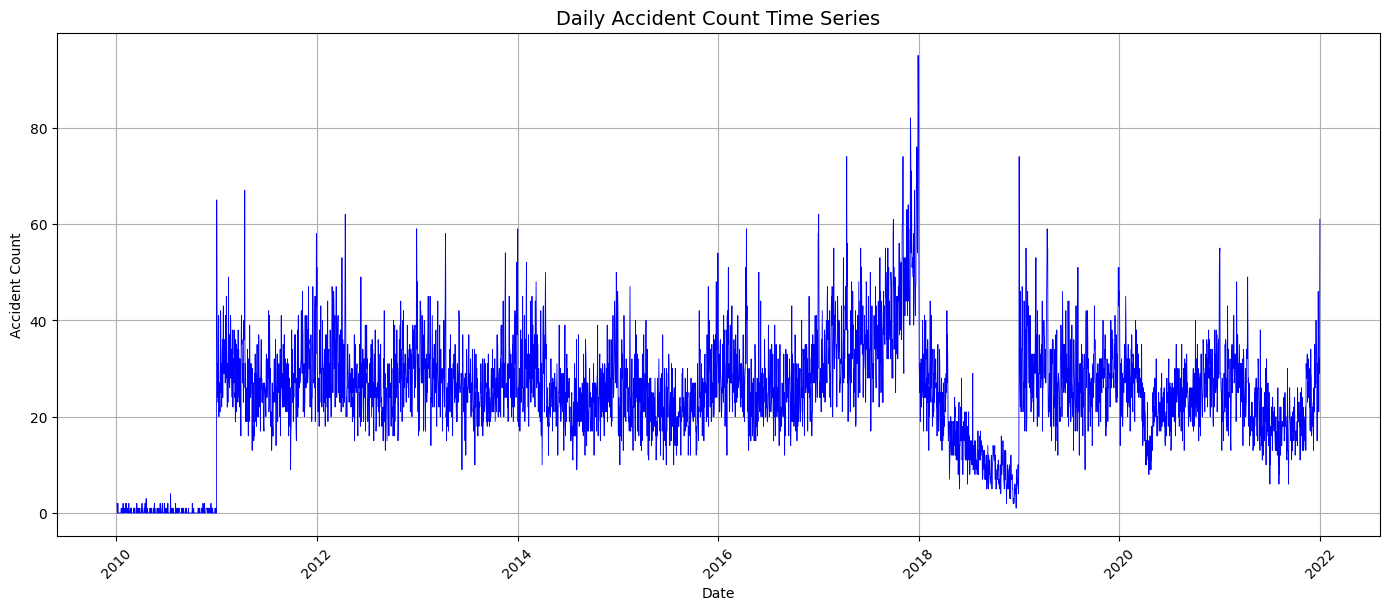

In [11]:
import matplotlib.pyplot as plt

# Ensure your DataFrame has a datetime index
daily_incidents.index = pd.to_datetime(daily_incidents.index)

# Fill missing days with 0 if needed
time_series = daily_incidents['daily_accidents'].resample('D').sum().fillna(0)

# Plot the time series
plt.figure(figsize=(14, 6))
plt.plot(time_series.index, time_series.values, color='blue', linewidth=0.6)
plt.title("Daily Accident Count Time Series", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Accident Count")
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

### AFTER

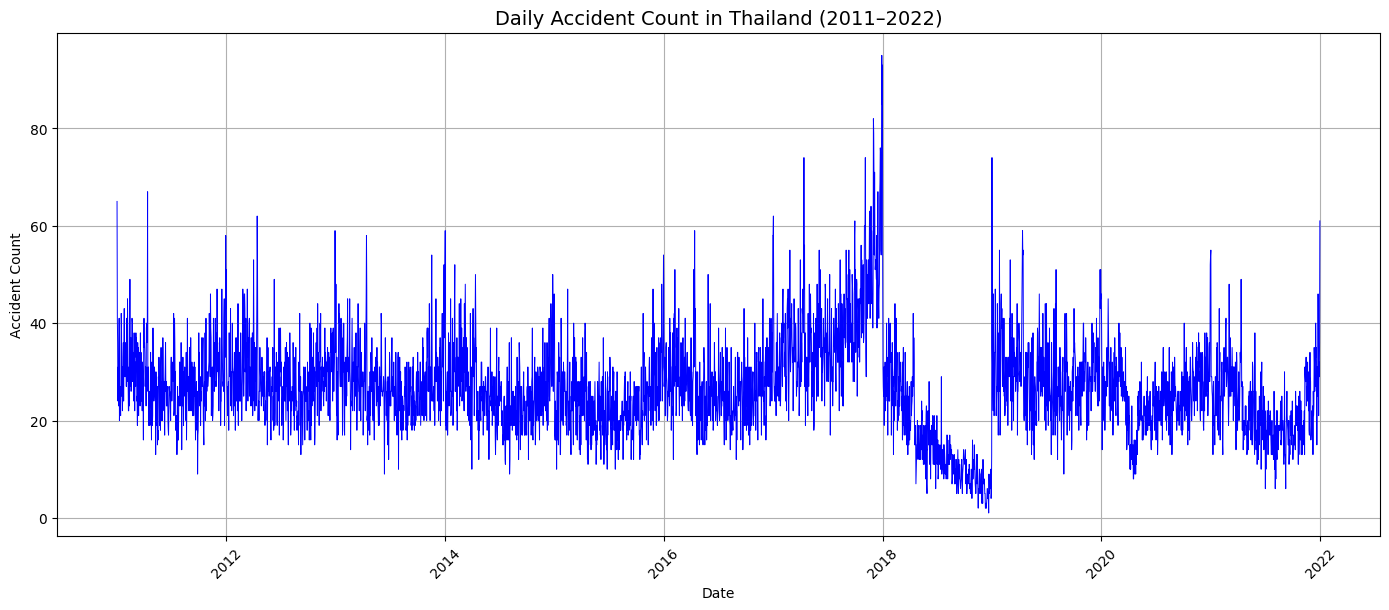

In [12]:
# Save preprocessed data to CSV
processed_data = pd.DataFrame({
    'date': time_series.index,
    'count': time_series.values
})
output_file = "processed_Accident_thailand.csv"
processed_data.to_csv(output_file, index=False)

filtered_data = processed_data[~(processed_data['date'].dt.year == 2010)]

# Ensure 'date' column is in datetime format
filtered_data['date'] = pd.to_datetime(filtered_data['date'])

# Set date as index
filtered_data.set_index('date', inplace=True)

# Plot the time series
plt.figure(figsize=(14, 6))
plt.plot(filtered_data.index, filtered_data['count'], color='Blue', linewidth=0.7)
plt.title("Daily Accident Count in Thailand (2011–2022)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Accident Count")
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


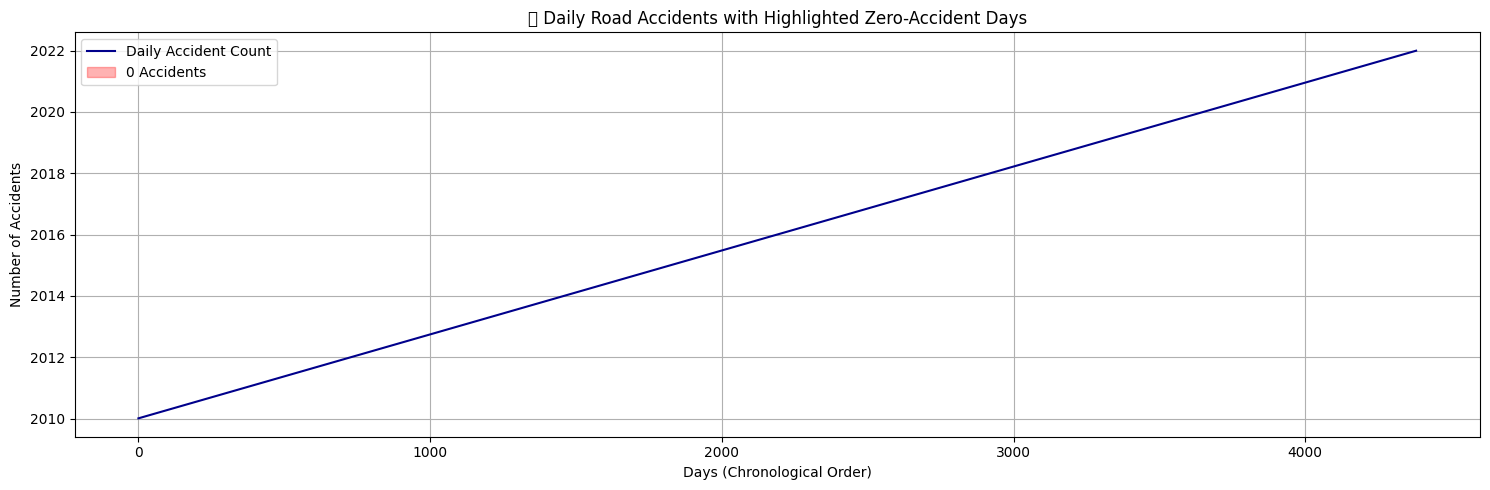

In [13]:
# Convert 'date' column to datetime if not already
processed_data['date'] = pd.to_datetime(processed_data['date'])

# Create numeric x-axis values
x_values = np.arange(len(processed_data))
y_values = processed_data['date'].values

# Identify zero-accident days
zero_accidents = y_values == 0

# Plot the time series
plt.figure(figsize=(15, 5))
plt.plot(x_values, y_values, label='Daily Accident Count', color='darkblue')

# Highlight zero-accident periods
plt.fill_between(x_values, 0, y_values, where=zero_accidents, color='red', alpha=0.3, label='0 Accidents')

# Customize plot
plt.title('📉 Daily Road Accidents with Highlighted Zero-Accident Days')
plt.xlabel('Days (Chronological Order)')
plt.ylabel('Number of Accidents')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# 5. Stationarity Testing and Time Series Decomposition
We use the Augmented Dickey-Fuller test to assess stationarity and decompose the time series into trend, seasonality, and residual components.

In [14]:
def test_stationarity(timeseries):
    result = adfuller(timeseries.dropna())
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    for key, value in result[4].items():
        print(f'Critical Value ({key}): {value:.3f}')
    return result[1]

In [15]:
# Test stationarity
p_value = test_stationarity(time_series)
print(f"--- Stationarity Test Result for {dataset_name} ---")
print(f"ADF p-value: {p_value}")

ADF Statistic: -3.408004
p-value: 0.010689
Critical Value (1%): -3.432
Critical Value (5%): -2.862
Critical Value (10%): -2.567
--- Stationarity Test Result for Accident ---
ADF p-value: 0.010689011601876608


In [16]:
# Function to decompose time series into components
def decompose_series(timeseries, dataset_name):
    decomposition = seasonal_decompose(timeseries, model='additive', period=30)  # Assume monthly seasonality
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid
    
    # Plot components with titles
    plt.figure(figsize=(12, 8))
    plt.subplot(411)
    plt.plot(timeseries, label='Original Series')
    plt.legend(loc='best')
    plt.title(f'Original Time Series - {dataset_name}')
    plt.subplot(412)
    plt.plot(trend, label='Trend')
    plt.legend(loc='best')
    plt.title(f'Trend Component - {dataset_name}')
    plt.subplot(413)
    plt.plot(seasonal, label='Seasonality')
    plt.legend(loc='best')
    plt.title(f'Seasonal Component - {dataset_name}')
    plt.subplot(414)
    plt.plot(residual, label='Residuals')
    plt.legend(loc='best')
    plt.title(f'Residual Component - {dataset_name}')
    plt.suptitle(f'Time Series Decomposition - {dataset_name}')
    plt.tight_layout()
    plt.show()

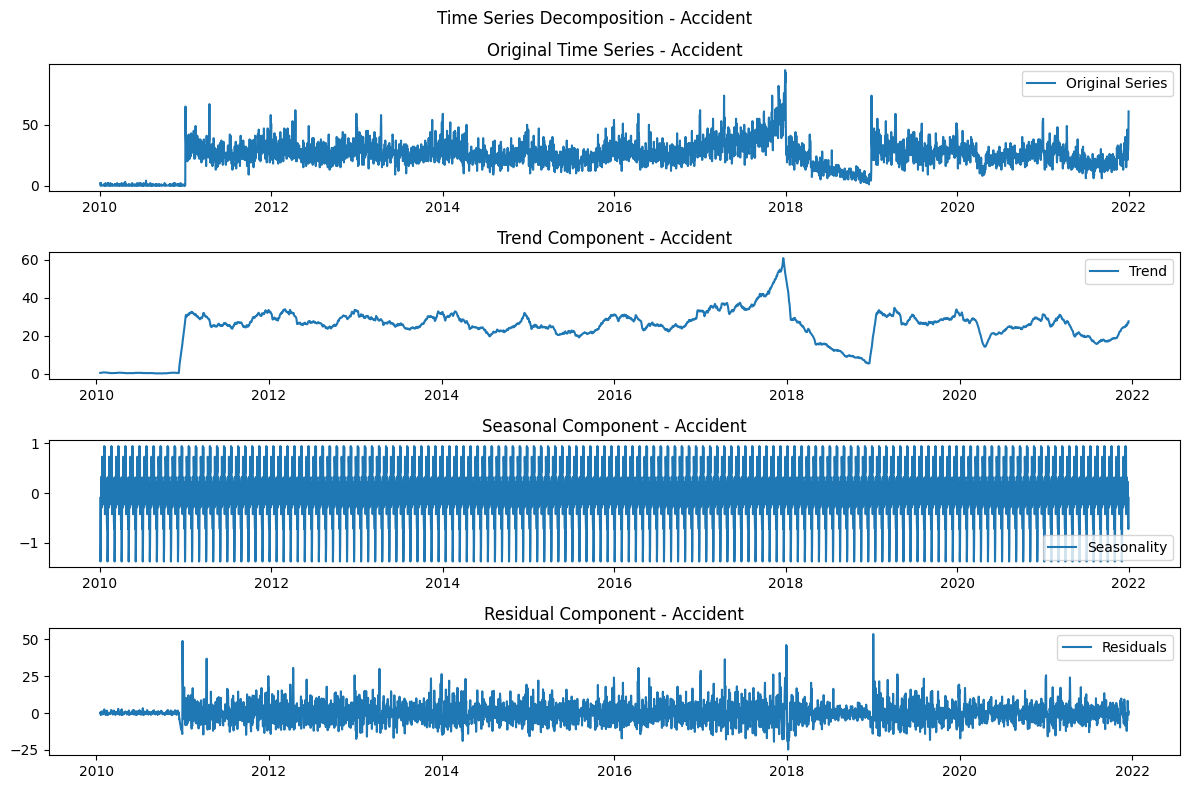

In [17]:
# Decompose time series
decompose_series(time_series, dataset_name)

# 6. Data Normalization
We scale the data using Min-Max normalization to prepare it for deep learning models.

In [18]:
from sklearn.preprocessing import MinMaxScaler  # 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

# Normalize data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(time_series.values.reshape(-1, 1))

# Print normalized data
print("Scaled Data (10 values) ")
print(scaled_data[-10:])


Scaled Data (10 values) 
[[0.32631579]
 [0.28421053]
 [0.26315789]
 [0.48421053]
 [0.36842105]
 [0.22105263]
 [0.33684211]
 [0.30526316]
 [0.37894737]
 [0.64210526]]


In [19]:
print("Mean of scaled data:", scaled_data.mean())
print("Std of scaled data:", scaled_data.std())

Mean of scaled data: 0.25697089104866705
Std of scaled data: 0.1252282322406075


In [20]:
# DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=['Scaled_Value'])

# File CSV
scaled_df.to_csv('scaled_data.csv', index=False)

print("Scaled data saved successfully as 'scaled_data.csv'")

Scaled data saved successfully as 'scaled_data.csv'


In [21]:
print("Number of values in scaled_data:", scaled_data.shape[0])

Number of values in scaled_data: 4381


In [22]:
print("Original min:", time_series.min(), "max:", time_series.max())
print("Scaled min:", scaled_data.min(), "max:", scaled_data.max())

Original min: 0 max: 95
Scaled min: 0.0 max: 1.0


# 7. Sequence Creation and Dataset Splitting

We prepare the time series data for deep learning by converting it into input-output sequences using a sliding window approach. This is followed by a structured train-dev-test split:

- **Window Size**: X days (each sample will consist of 7,15,30 time steps).
- **Train Set**: 70% of the original data.
- **Dev (Validation) Set**: 15% (split from train+dev block).
- **Test Set**: Final 15%, left out for final evaluation.

This chronological (non-shuffled) split preserves the temporal order, which is essential for time series forecasting tasks.


In [23]:
# Create sequences
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i - window_size:i, 0])  # Window size  يوم سابق
        y.append(data[i, 0])                  # قيمة اليوم التالي
    return np.array(X), np.array(y)

In [24]:
from sklearn.model_selection import train_test_split

# Define sliding window size (e.g., 7,15 or 30 days)
window_size = 7

# Function to generate input-output pairs from time series
def create_sequences(data, window):
    X, y = [], []
    for i in range(len(data) - window):
        X.append(data[i:i+window])
        y.append(data[i+window])
    return np.array(X), np.array(y)

# Create sequences
X, y = create_sequences(scaled_data, window_size)

# Summary
print(f"--- Sequence Creation (Daily) ---")
print(f"Input shape (X): {X.shape}")  # (samples, timesteps)
print(f"Target shape (y): {y.shape}")
print(f"Example input sequence:\n{X[0].flatten()}")
print(f"Corresponding target value: {y[0]}")

# Reshape input for RNNs: [samples, time steps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))  # One feature: daily accident count

# First split: 85% train+dev, 15% test
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)

# Second split: from the 85%, take ~17.65% (15% of original) for dev
dev_ratio = 0.15 / 0.85  # ≈ 0.1765
X_train, X_dev, y_train, y_dev = train_test_split(X_temp, y_temp, test_size=dev_ratio, shuffle=False)

# Summary of splits
print(f"\n--- Train-Dev-Test Split ---")
print(f"Training samples:     {X_train.shape[0]}")
print(f"Development samples:  {X_dev.shape[0]}")
print(f"Testing samples:      {X_test.shape[0]}")
print(f"Each input sequence:  {X_train.shape[1]} time steps × {X_train.shape[2]} feature(s)")


--- Sequence Creation (Daily) ---
Input shape (X): (4374, 7, 1)
Target shape (y): (4374, 1)
Example input sequence:
[0.02105263 0.         0.         0.02105263 0.         0.
 0.        ]
Corresponding target value: [0.]

--- Train-Dev-Test Split ---
Training samples:     3061
Development samples:  656
Testing samples:      657
Each input sequence:  7 time steps × 1 feature(s)


# 8. Model Building and Training

We experiment with two deep learning architectures for time series prediction:

- **LSTM (Long Short-Term Memory)**
- **GRU (Gated Recurrent Unit)**

For each architecture, we vary the number of hidden layers: 0, 2, and 4. All models are compiled using Mean Squared Error (MSE) as the loss function and the Adam optimizer.

We also track:
- Training duration for each configuration
- Final training and validation losses


## LSTM

#### LSTM Model – Training & Evaluation (0, 2, 4 Hidden Layers)

We build and evaluate LSTM models using three configurations for the number of hidden layers: **0, 2, and 4**. Each model is trained using the same hyperparameters for fairness. The performance is evaluated using key regression metrics:

- **MSLE** (Mean Squared Logarithmic Error)
- **Training Time (seconds)**

To prevent overfitting, we use `EarlyStopping` with `restore_best_weights=True`.


### 8.1.1 Model trainig 

In [25]:
import pandas as pd
import numpy as np
import time
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error

# Store evaluation results
lstm_results_df = []

# Store predictions and histories
lstm_predictions = {}
lstm_histories = {}

# Define hidden layer configurations to test
hidden_layer_configs = [0, 2, 4]

for num_hidden_layers in hidden_layer_configs:
    print(f"\nTraining LSTM with {num_hidden_layers} hidden layer(s)")

    model = Sequential()

    if num_hidden_layers == 0:
        model.add(LSTM(64, input_shape=(X_train.shape[1], 1), activation='tanh'))
    else:
        # First LSTM layer (return_sequences=True to pass sequence to next)
        model.add(LSTM(64, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], 1)))
        model.add(Dropout(0.2))

        # Middle LSTM layers
        for _ in range(1, num_hidden_layers - 1):
            model.add(LSTM(64, activation='tanh', return_sequences=True))
            model.add(Dropout(0.2))

        # Last LSTM layer
        model.add(LSTM(64, activation='tanh'))
        model.add(Dropout(0.2))

    # Output layer
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mse')

    # Start training timer
    start_time = time.time()

    # Training
    history = model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=32,
        validation_data=(X_dev, y_dev),
        verbose=1,
        callbacks=[EarlyStopping(patience=5, restore_best_weights=True)]
    )

    end_time = time.time()
    training_time = end_time - start_time

    # Save training history
    lstm_histories[num_hidden_layers] = history.history

    # Predictions
    y_pred = model.predict(X_test)
    y_pred_inv = scaler.inverse_transform(y_pred)
    y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Clip negatives (for MSLE)
    y_pred_clipped = np.clip(y_pred_inv, a_min=0, a_max=None)
    y_test_clipped = np.clip(y_test_inv, a_min=0, a_max=None)

    # Save predictions
    lstm_predictions[num_hidden_layers] = y_pred_inv.flatten()

    # Evaluation metrics
    msle = mean_squared_log_error(y_test_clipped, y_pred_clipped)

    # Store results
    lstm_results_df.append({
        'Hidden Layers': num_hidden_layers,
        'MSLE': msle,
        'Training Time (s)': training_time
    })

    # Print results
    print(f"Evaluation (Hidden Layers = {num_hidden_layers}):")
    print(f"MSLE: {msle:.4f}")
    print(f"Training Time: {training_time:.2f} seconds")

# Convert results to DataFrame for analysis
lstm_results_df = pd.DataFrame(lstm_results_df)
print("\n Final LSTM Evaluation Summary:")
print(lstm_results_df)



Training LSTM with 0 hidden layer(s)
Epoch 1/100


2025-07-01 19:20:16.398741: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0254 - val_loss: 0.0063
Epoch 2/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0065 - val_loss: 0.0061
Epoch 3/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0066 - val_loss: 0.0060
Epoch 4/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0061 - val_loss: 0.0059
Epoch 5/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0061 - val_loss: 0.0058
Epoch 6/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0058 - val_loss: 0.0059
Epoch 7/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0058 - val_loss: 0.0057
Epoch 8/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0057 - val_loss: 0.0056
Epoch 9/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0057 - val_loss: 0.0059
Epoch 10/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0058 - val_loss: 0.0056
Epoch 11/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0056 - val_loss: 0.0056
Epoch 12/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0054 - val_l

### 8.1.2 Evaluation of Best LSTM Model (Based on MSLE)

We identify the best-performing LSTM configuration based on **lowest MSLE** and inspect its predictions in original order. We then save:

- All test predictions with actual values
- A subset with absolute error 

Finally, we visualize the predictions vs. actual values to assess how well the model tracks real accident counts.


In [26]:
# Create a DataFrame using daily dates instead of months
lstm_results = pd.DataFrame({
    'Day': time_series.index[-len(y_test):].strftime('%Y-%m-%d'),  # Format dates as strings (YYYY-MM-DD)
    'Original': y_test_inv.flatten(),                              # Actual target values (inverted/scaled back)
    'Predicted_LSTM_0_Layers': lstm_predictions[0],               # Predictions from LSTM with 0 layers
    'Predicted_LSTM_2_Layers': lstm_predictions[2],               # Predictions from LSTM with 2 layers
    'Predicted_LSTM_4_Layers': lstm_predictions[4]                # Predictions from LSTM with 4 layers
})

# Display first 10 rows of LSTM results
print("\nLSTM Results:")
print(lstm_results.head(5))


LSTM Results:
          Day  Original  Predicted_LSTM_0_Layers  Predicted_LSTM_2_Layers  \
0  2020-03-15      30.0                27.013826                26.851681   
1  2020-03-16      25.0                28.277317                28.293194   
2  2020-03-17      26.0                27.028183                27.126158   
3  2020-03-18      24.0                26.179728                26.016830   
4  2020-03-19      28.0                25.378304                25.339016   

   Predicted_LSTM_4_Layers  
0                26.476727  
1                27.072134  
2                27.469395  
3                25.858309  
4                25.662487  


Best hidden layer config (based on lowest MSLE): 2

 Sample Predictions (LSTM with 2 Hidden Layer(s)):
   True Value  Predicted Value  Absolute Error
0          30        26.851681        3.148319
1          25        28.293194        3.293194
2          26        27.126158        1.126158
3          24        26.016830        2.016830
4          28        25.339016        2.660984
5          24        26.690271        2.690271
6          26        26.133783        0.133783
7          35        26.063076        8.936924
8          20        28.692295        8.692295
9          19        25.362202        6.362202


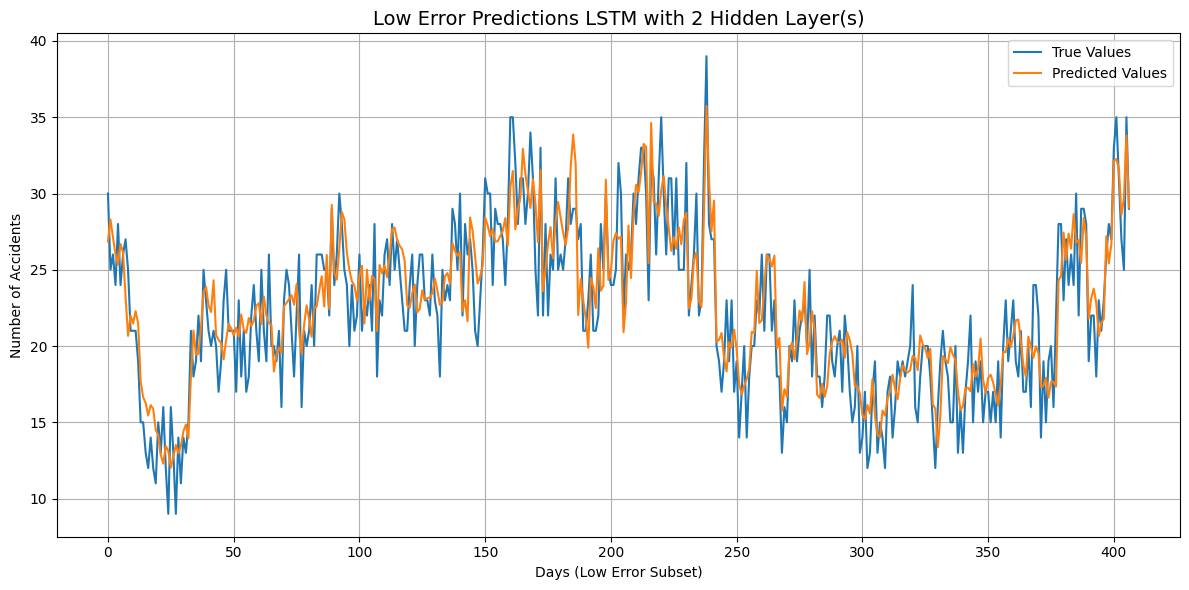

In [27]:
# Identify best-performing model based on MSLE
best_config = lstm_results_df.loc[lstm_results_df['MSLE'].idxmin(), 'Hidden Layers']
print(f"Best hidden layer config (based on lowest MSLE): {best_config}")

# Create DataFrame with predictions vs true values
lstm_results_original_order = pd.DataFrame({
    'True Value': y_test_inv.flatten(),
    'Predicted Value': lstm_predictions[best_config],
})

# Calculate Absolute Error
lstm_results_original_order['Absolute Error'] = np.abs(
    lstm_results_original_order['True Value'] - lstm_results_original_order['Predicted Value']
)

# Round true values for display clarity
lstm_results_original_order['True Value'] = lstm_results_original_order['True Value'].round().astype(int)

# Reset index
lstm_results_original_order.reset_index(drop=True, inplace=True)

# Print sample
print(f"\n Sample Predictions (LSTM with {best_config} Hidden Layer(s)):")
print(lstm_results_original_order.head(10))

# Save full predictions
filename = f"lstm_predictions_original_order_{best_config}_hidden_layers.csv"
lstm_results_original_order.to_csv(filename, index=False)


# Filter for low-error cases (absolute error < 5)
low_error_predictions = lstm_results_original_order[lstm_results_original_order['Absolute Error'] < 5]

# Save low-error predictions
low_error_filename = f"lstm_predictions_low_error_{best_config}_hidden_layers.csv"
low_error_predictions.to_csv(low_error_filename, index=False)


# Plot predicted vs true for low-error subset
plt.figure(figsize=(12, 6))
plt.plot(low_error_predictions['True Value'].values, label='True Values')
plt.plot(low_error_predictions['Predicted Value'].values, label='Predicted Values')
plt.title(f'Low Error Predictions LSTM with {best_config} Hidden Layer(s)', fontsize=14)
plt.xlabel('Days (Low Error Subset)')
plt.ylabel('Number of Accidents')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### 8.1.3 Training vs Validation Loss Curves

Below we visualize the learning curves for each LSTM configuration to diagnose:
- Overfitting (val_loss > loss)
- Underfitting (high loss values)
- Convergence speed


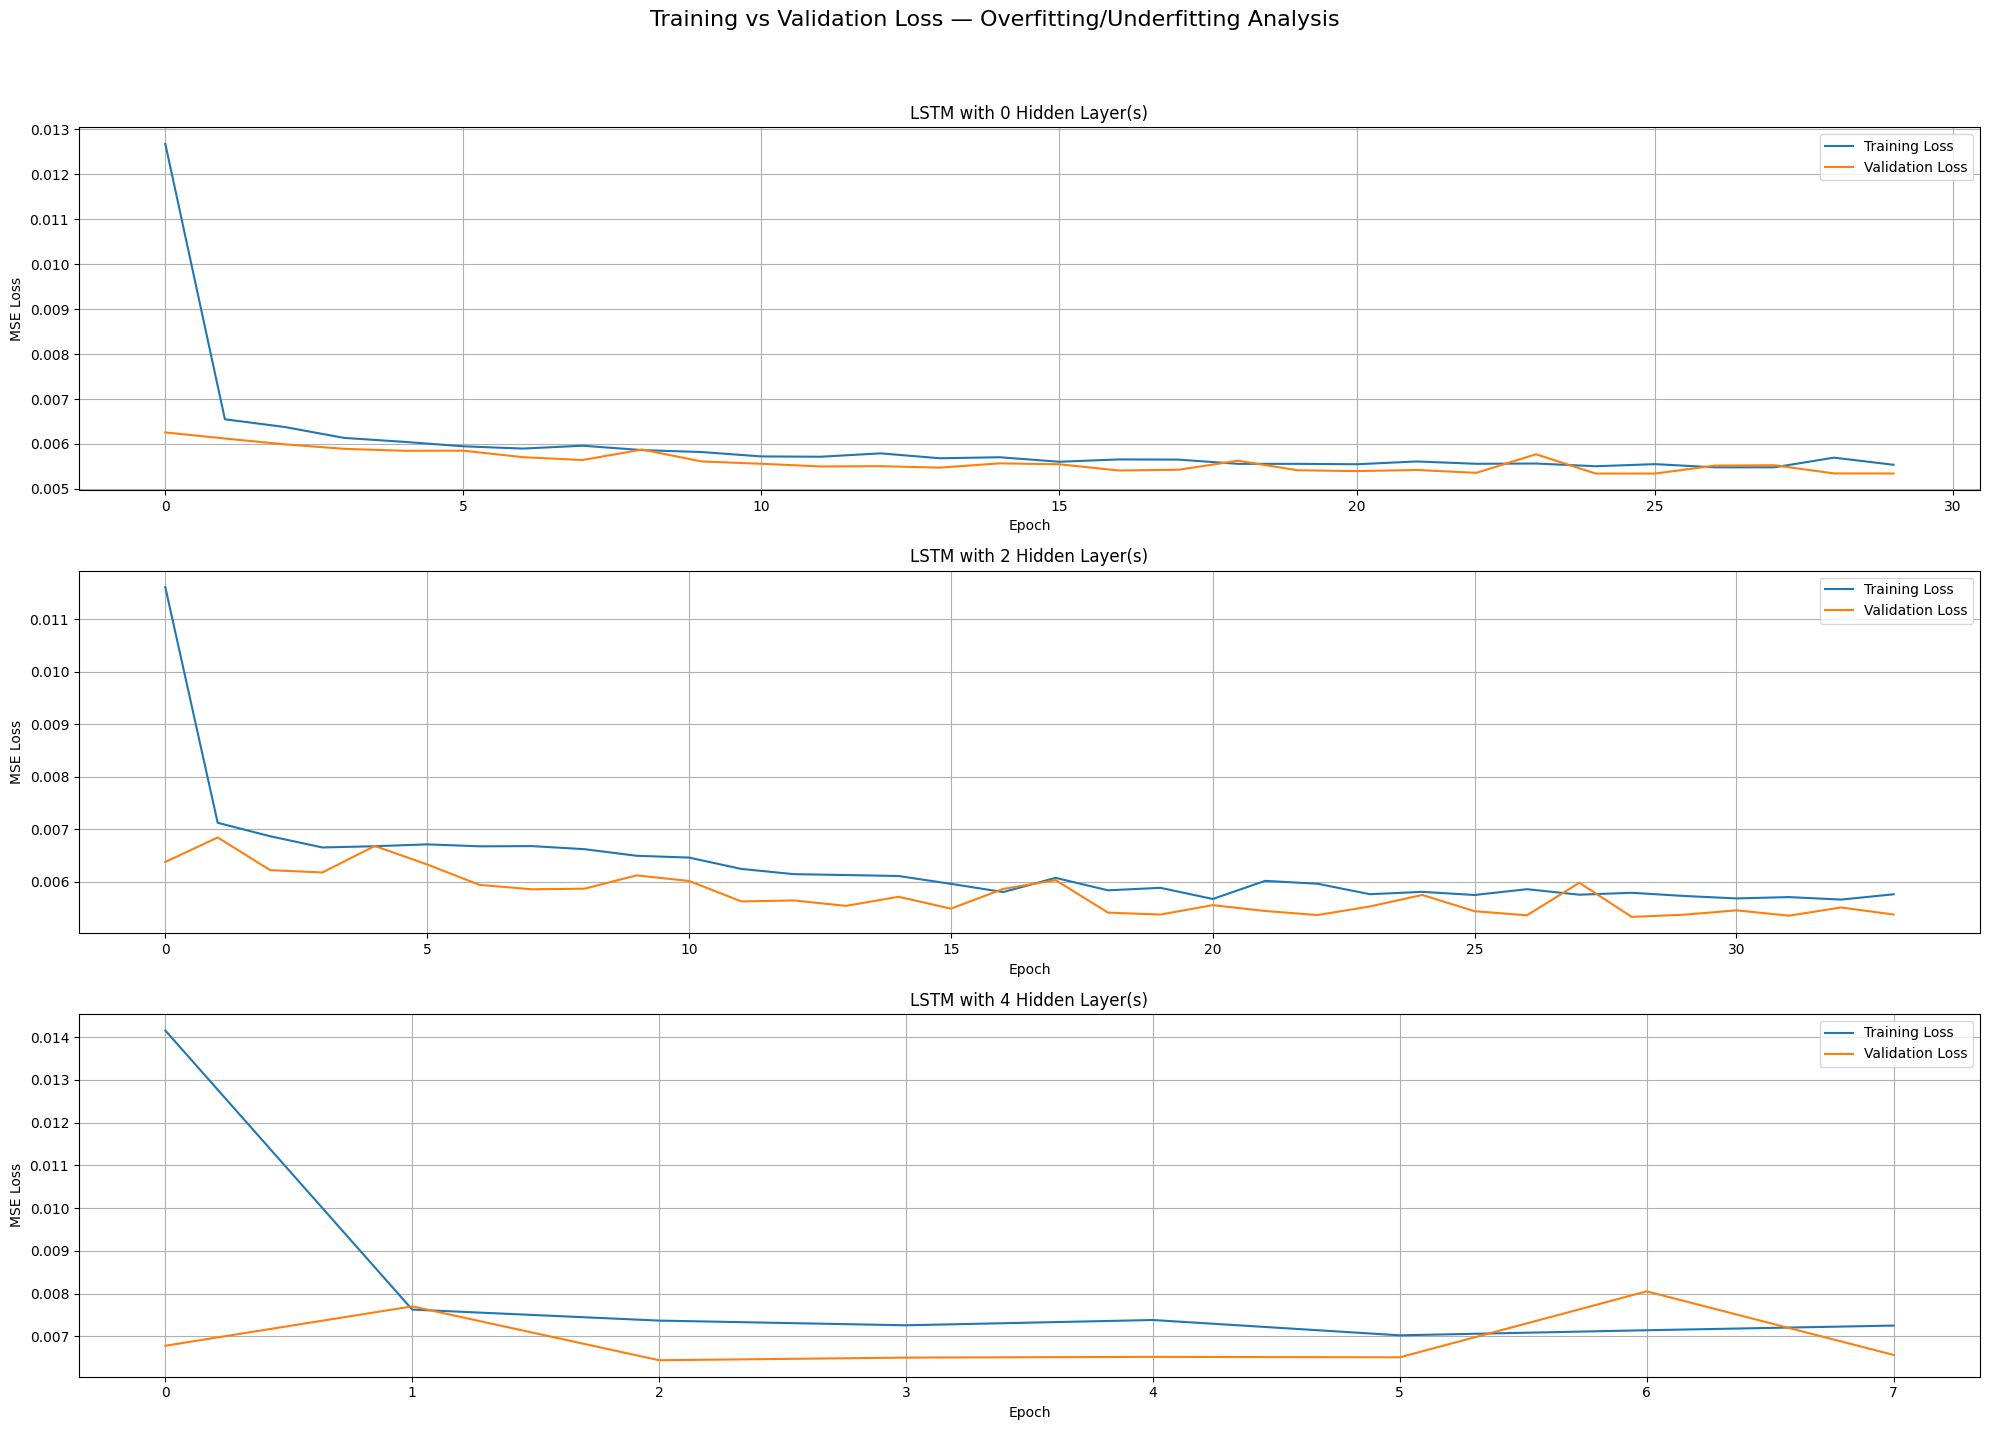

In [28]:
plt.figure(figsize=(20, 5 * len(hidden_layer_configs)))

for i, num_hidden_layers in enumerate(hidden_layer_configs):
    history = lstm_histories[num_hidden_layers]

    plt.subplot(len(hidden_layer_configs), 1, i + 1)
    plt.plot(history['loss'], label='Training Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title(f'LSTM with {num_hidden_layers} Hidden Layer(s)')
    plt.xlabel('Epoch')
    plt.ylabel('MSE Loss')
    plt.legend()
    plt.grid(True)

plt.suptitle('Training vs Validation Loss — Overfitting/Underfitting Analysis', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## GRU

### 8.2.1 GRU Model Training

In this section, we train GRU (Gated Recurrent Unit) models with different numbers of hidden layers (0, 2, and 4) to predict daily accident counts.

For each configuration:
- We build a GRU-based neural network
- Train it on the training set and validate on a development set
- Measure training time and prediction performance
- Evaluate using MSLE (Mean Squared Logarithmic Error)

The results will help us understand how model depth affects performance on time series data.


In [29]:
# Store evaluation results
gru_results_df = []

# Store predictions for each configuration
gru_predictions = {}

# Store training histories
gru_histories = {}

# Define hidden layer configurations
hidden_layer_configs = [0, 2, 4]

for num_hidden_layers in hidden_layer_configs:
    print(f"\nTraining GRU with {num_hidden_layers} hidden layer(s)")

    model = Sequential()

    if num_hidden_layers == 0:
        model.add(GRU(128, input_shape=(X_train.shape[1], 1), activation='tanh'))
    else:
        # First GRU layer
        model.add(GRU(128, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], 1)))
        model.add(Dropout(0.2))

        # Middle GRU layers
        for i in range(1, num_hidden_layers - 1):
            model.add(GRU(128, activation='tanh', return_sequences=True))
            model.add(Dropout(0.2))

        # Last GRU layer (no return_sequences)
        model.add(GRU(128, activation='tanh'))
        model.add(Dropout(0.2))

    # Output layer
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

    # Start timing
    start_time = time.time()

    # Train using development set for validation
    history = model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=32,
        validation_data=(X_dev, y_dev),
        verbose=1,
        callbacks=[EarlyStopping(patience=5, restore_best_weights=True)]
    )

    # Save training history
    gru_histories[num_hidden_layers] = history.history

    end_time = time.time()
    training_time = end_time - start_time

    # Predictions
    y_pred = model.predict(X_test)
    y_pred_inv = scaler.inverse_transform(y_pred)
    y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Clip negatives for MSLE
    y_pred_clipped = np.clip(y_pred_inv, a_min=0, a_max=None)
    y_test_clipped = np.clip(y_test_inv, a_min=0, a_max=None)

    # Save predictions
    gru_predictions[num_hidden_layers] = y_pred_inv.flatten()

    # Evaluation
    msle = mean_squared_log_error(y_test_clipped, y_pred_clipped)

    gru_results_df.append({
        'Hidden Layers': num_hidden_layers,
        'MSLE': msle,
        'Training Time (s)': training_time
    })

    print(f"Evaluation (Hidden Layers = {num_hidden_layers}):")
    print(f"MSLE: {msle:.4f}")
    print(f"Training Time: {training_time:.2f} seconds")


Training GRU with 0 hidden layer(s)
Epoch 1/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0195 - val_loss: 0.0059
Epoch 2/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0062 - val_loss: 0.0059
Epoch 3/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0059 - val_loss: 0.0057
Epoch 4/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0056 - val_loss: 0.0057
Epoch 5/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0057 - val_loss: 0.0055
Epoch 6/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0060 - val_loss: 0.0054
Epoch 7/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0054 - val_loss: 0.0054
Epoch 8/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0055 - val_loss: 0.0054
Epoch 9/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0053 - val_loss: 0.0054
Epoch 10/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0054 - val_loss: 0.0054
Epoch 11/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0057 - val_loss: 0.0056
Epoch 12/100
96/96 ━━━━━━

### 8.2.2 Evaluation of Best GRU Model (Based on MSLE)

In [30]:
# Reconstruct daily date range for test set
# This assumes you have `time_series` as a full daily series before sequence creation
test_days = time_series.index[-len(y_test):]  # Match test set length

# Create DataFrame with GRU predictions
gru_results = pd.DataFrame({
    'Day': test_days.strftime('%Y-%m-%d'),               # Convert datetime to YYYY-MM-DD
    'Original': y_test_inv.flatten(),                    # Actual accident counts
    'Predicted_GRU_0_Layers': gru_predictions[0],        # GRU with 0 hidden layers
    'Predicted_GRU_2_Layers': gru_predictions[2],        # GRU with 2 hidden layers
    'Predicted_GRU_4_Layers': gru_predictions[4]         # GRU with 4 hidden layers
})

# Display sample results
print("\nGRU Results (first 5 rows):")
print(gru_results.head(5))



GRU Results (first 5 rows):
          Day  Original  Predicted_GRU_0_Layers  Predicted_GRU_2_Layers  \
0  2020-03-15      30.0               27.119659               27.184887   
1  2020-03-16      25.0               28.182341               28.503721   
2  2020-03-17      26.0               26.838173               26.854740   
3  2020-03-18      24.0               26.380636               25.989880   
4  2020-03-19      28.0               25.645512               25.423098   

   Predicted_GRU_4_Layers  
0               26.870144  
1               28.080978  
2               26.709583  
3               25.819668  
4               25.263353  


Best hidden layer config (based on lowest MSLE): 4

Sample Predictions (GRU with 4 Hidden Layer(s)):
   True Value  Predicted Value  Absolute Error
0          30        26.870144        3.129856
1          25        28.080978        3.080978
2          26        26.709583        0.709583
3          24        25.819668        1.819668
4          28        25.263353        2.736647
5          24        26.602526        2.602526
6          26        25.844891        0.155109
7          35        25.753250        9.246750
8          20        28.486227        8.486227
9          19        24.933018        5.933018


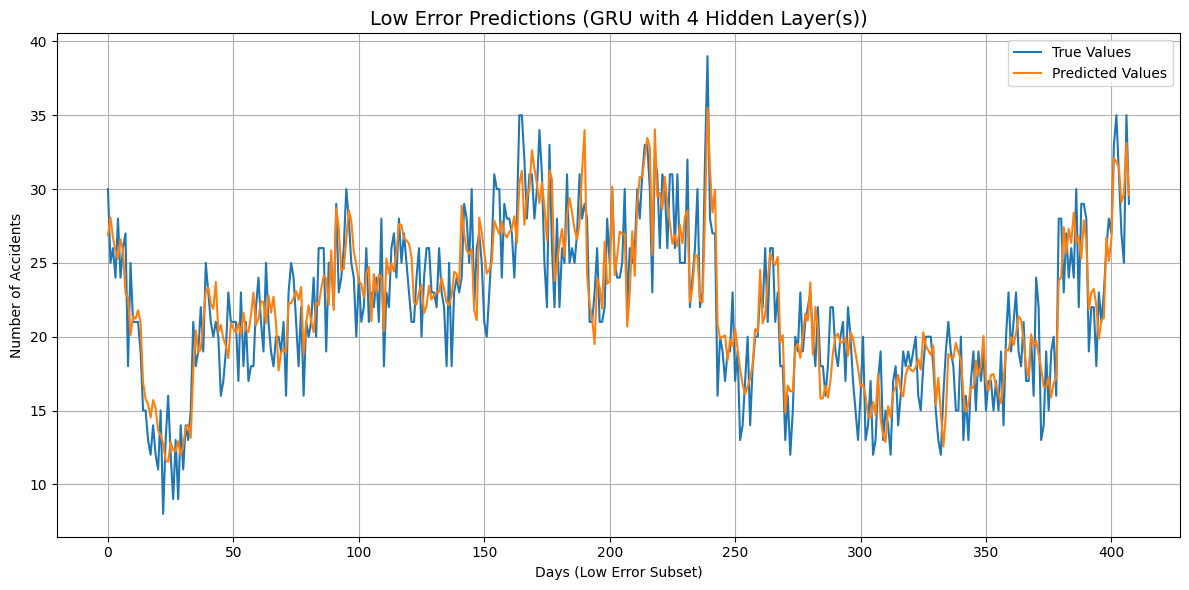

In [31]:
# Convert list of results to DataFrame
gru_results_df = pd.DataFrame(gru_results_df)

# Identify best-performing model based on MSLE
best_config = gru_results_df.loc[gru_results_df['MSLE'].idxmin(), 'Hidden Layers']
print(f"Best hidden layer config (based on lowest MSLE): {best_config}")

# Create DataFrame with predictions vs true values
gru_results_original_order = pd.DataFrame({
    'True Value': y_test_inv.flatten(),
    'Predicted Value': gru_predictions[best_config],  # was mistakenly lstm_predictions
})

# Calculate Absolute Error
gru_results_original_order['Absolute Error'] = np.abs(
    gru_results_original_order['True Value'] - gru_results_original_order['Predicted Value']
)

# Round true values
gru_results_original_order['True Value'] = gru_results_original_order['True Value'].round().astype(int)
gru_results_original_order.reset_index(drop=True, inplace=True)

# Sample output
print(f"\nSample Predictions (GRU with {best_config} Hidden Layer(s)):")
print(gru_results_original_order.head(10))

# Save predictions
filename = f"gru_predictions_original_order_{best_config}_hidden_layers.csv"
gru_results_original_order.to_csv(filename, index=False)

# Filter low-error predictions
low_error_predictions = gru_results_original_order[gru_results_original_order['Absolute Error'] < 5]

# Save low-error subset
low_error_filename = f"gru_predictions_low_error_{best_config}_hidden_layers.csv"
low_error_predictions.to_csv(low_error_filename, index=False)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(low_error_predictions['True Value'].values, label='True Values')
plt.plot(low_error_predictions['Predicted Value'].values, label='Predicted Values')
plt.title(f'Low Error Predictions (GRU with {best_config} Hidden Layer(s))', fontsize=14)
plt.xlabel('Days (Low Error Subset)')
plt.ylabel('Number of Accidents')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


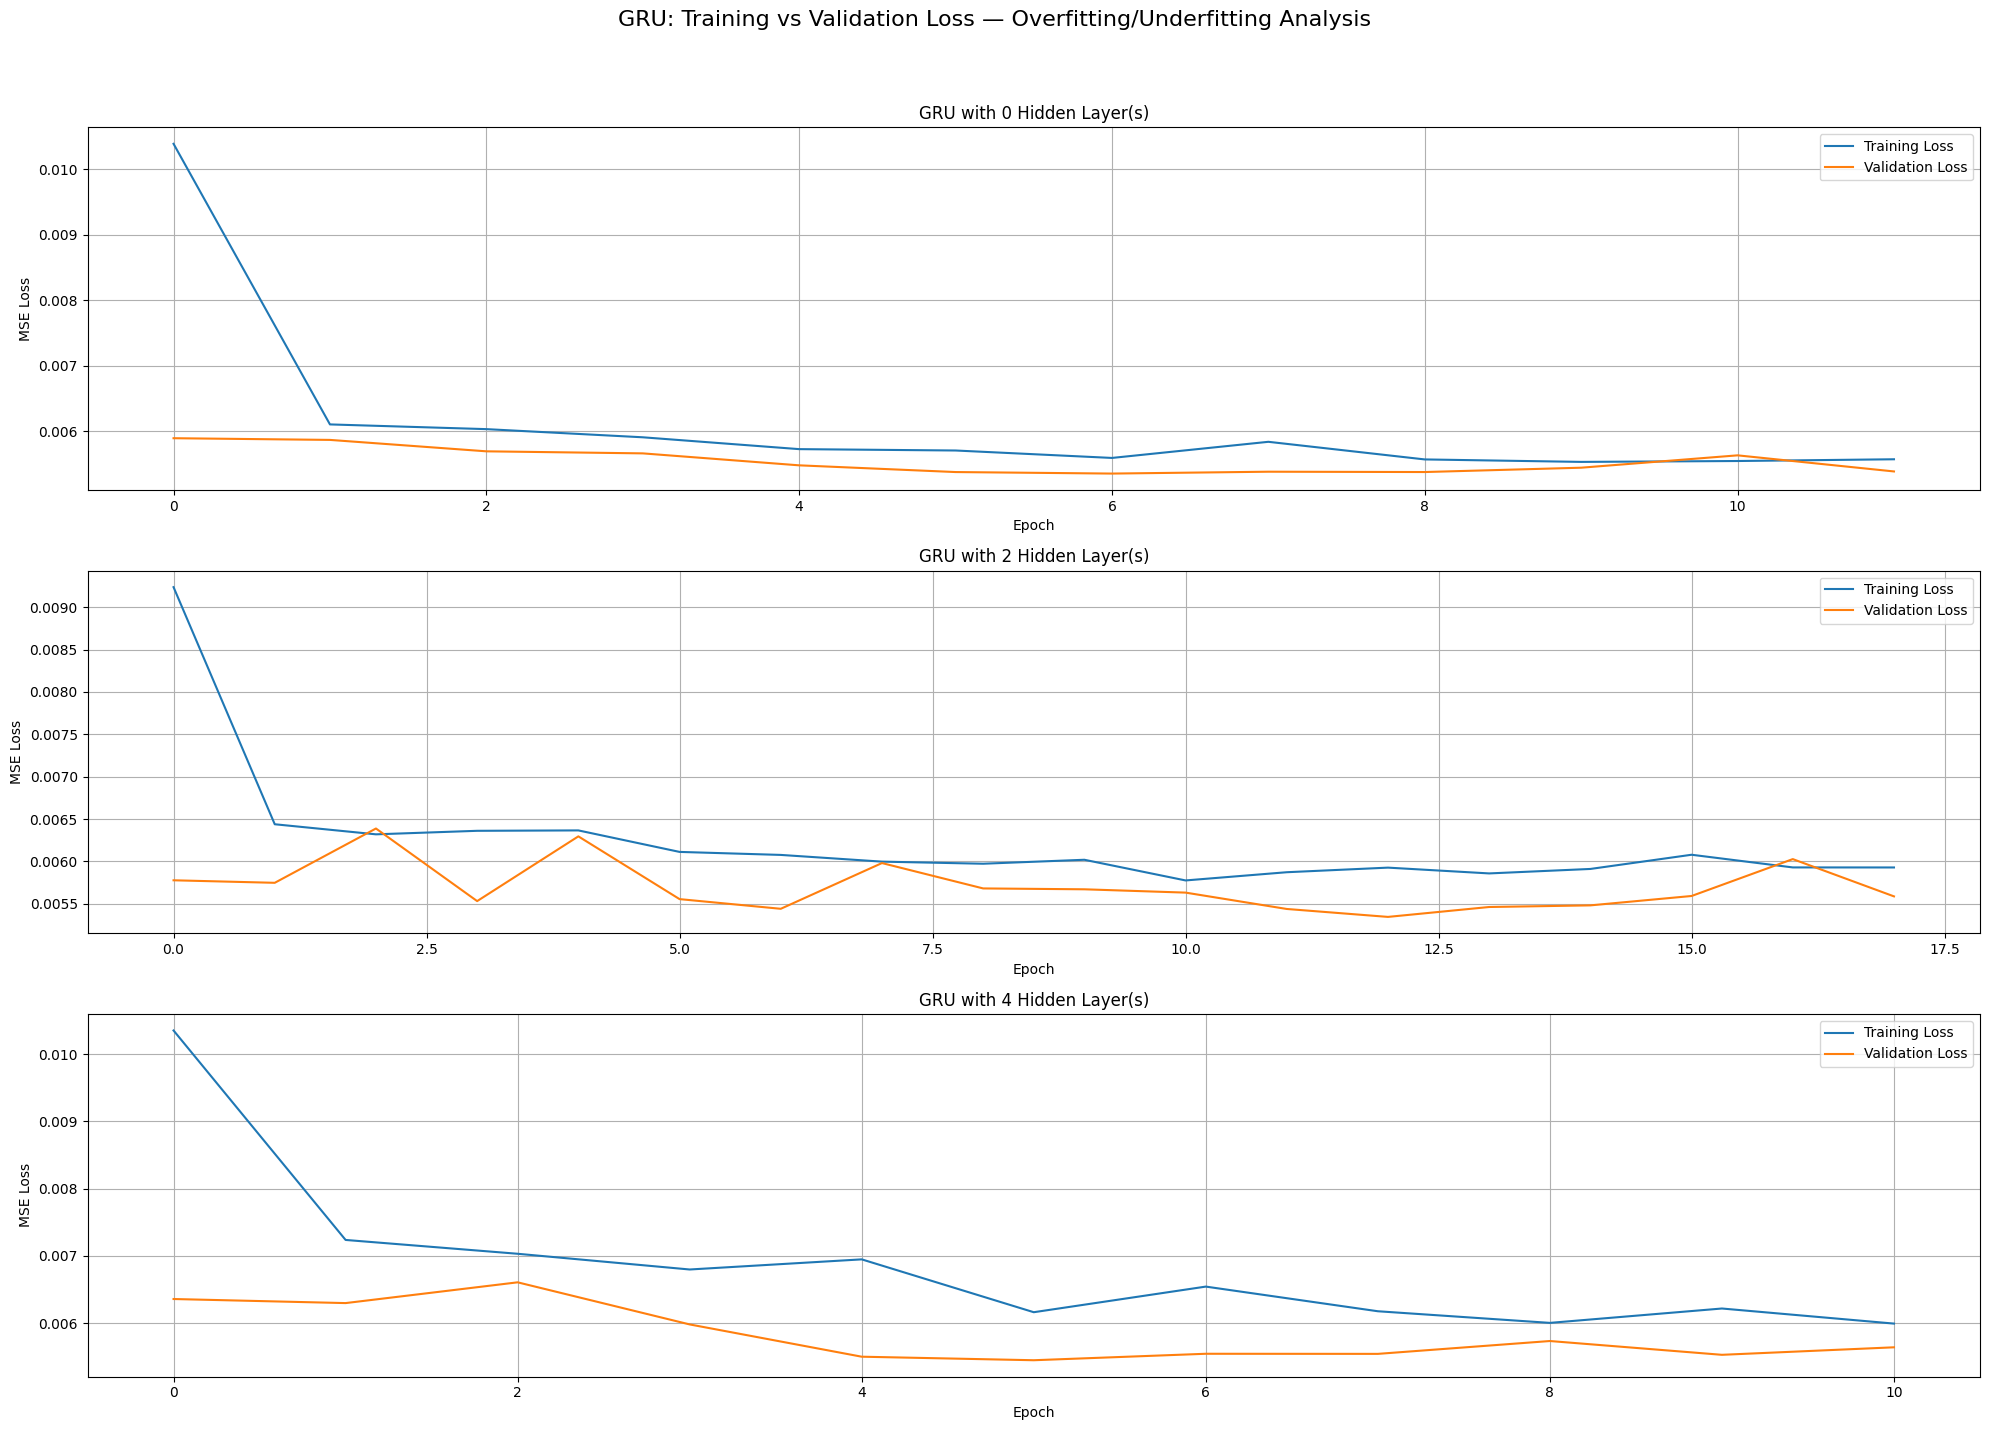

In [32]:
plt.figure(figsize=(20, 5 * len(hidden_layer_configs)))

for i, num_hidden_layers in enumerate(hidden_layer_configs):
    history = gru_histories[num_hidden_layers]  # Use GRU histories

    plt.subplot(len(hidden_layer_configs), 1, i + 1)
    plt.plot(history['loss'], label='Training Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title(f'GRU with {num_hidden_layers} Hidden Layer(s)')  # Title update
    plt.xlabel('Epoch')
    plt.ylabel('MSE Loss')
    plt.legend()
    plt.grid(True)

plt.suptitle('GRU: Training vs Validation Loss — Overfitting/Underfitting Analysis', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [33]:
import pandas as pd

# Add model name to DataFrames
lstm_results_df['Model'] = 'LSTM'
gru_results_df['Model'] = 'GRU'

# Merge LSTM and GRU results
combined_df = pd.concat([lstm_results_df, gru_results_df], ignore_index=True)

# Select only relevant columns and sort
combined_df = combined_df[['Model', 'Hidden Layers', 'MSLE', 'Training Time (s)']]
combined_df = combined_df.sort_values(by=['Hidden Layers', 'Model']).reset_index(drop=True)

# Display the combined comparison table
print("📊 LSTM vs GRU — Hidden Layers, MSLE, Training Time")
print(combined_df)


📊 LSTM vs GRU — Hidden Layers, MSLE, Training Time
  Model  Hidden Layers      MSLE  Training Time (s)
0   GRU              0  0.063936          13.932263
1  LSTM              0  0.063499          21.101658
2   GRU              2  0.063748          34.415805
3  LSTM              2  0.063098          38.730890
4   GRU              4  0.062970          44.278302
5  LSTM              4  0.071546          24.081529
